In [1]:
import os
import warnings

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

In [2]:
# 预设值
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None  # 展示所有列

In [3]:
# 初始数据
RAW_TRAIN = './datasets/serverless/total.csv'

## 1. 加载数据

In [4]:
# 加载原始数据
train_df = pd.read_csv(RAW_TRAIN)
train_df = train_df.sort_values(by=['QUEUE_ID', 'DOTTING_TIME']).reset_index(drop=True)
display(train_df)

,QUEUE_ID,CU,STATUS,QUEUE_TYPE,PLATFORM,CPU_USAGE,MEM_USAGE,LAUNCHING_JOB_NUMS,RUNNING_JOB_NUMS,SUCCEED_JOB_NUMS,CANCELLED_JOB_NUMS,FAILED_JOB_NUMS,DOTTING_TIME,RESOURCE_TYPE,DISK_USAGE
0,2,16,available,sql,x86_64,3,54,0,0,0,0,0,1590683100000,vm,20.0
1,2,16,available,sql,x86_64,2,54,0,0,0,0,0,1590683400000,vm,20.0
2,2,16,available,sql,x86_64,7,54,0,0,0,0,0,1590683700000,vm,20.0
3,2,16,available,sql,x86_64,4,54,0,0,0,0,0,1590684000000,vm,20.0
4,2,16,available,sql,x86_64,5,54,0,0,0,0,0,1590684120000,vm,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501725,87139,16,available,general,x86_64,3,36,0,0,0,0,0,1599867000000,vm,26.0
501726,87139,16,available,general,x86_64,2,36,0,0,0,0,0,1599867420000,vm,26.0
501727,87139,16,available,general,x86_64,3,36,0,0,0,0,0,1599867840000,vm,26.0
501728,87139,16,available,general,x86_64,2,36,0,0,0,0,0,1599868260000,vm,26.0


## 2. 数据预处理

In [5]:
def digitalization(fields):
    """将非数值型域转换为数值型."""

    for f in fields:
        # 构建编码器
        le = LabelEncoder()
        le.fit(train_df[f])

        # 设置新值
        train_df[f] = le.transform(train_df[f])
        print('%s:' % f, le.classes_)


def pre_processing():
    """预处理."""
    print('Preprocessing...')

    # 缺失值填充
    # 经检验，为NaN的都是vm（通过QUEUE_ID查找）
    train_df['RESOURCE_TYPE'].fillna('vm', inplace=True)

    # 观察数据，填充0比较合理（NaN集中在数据前面，可能是由服务器尚未开始运行导致的）
    train_df['DISK_USAGE'].fillna(0, inplace=True)

    # 需要转换的列
    fields = ['STATUS', 'QUEUE_TYPE', 'PLATFORM', 'RESOURCE_TYPE']

    # 数值化
    digitalization(fields)

    # 重命名，原来的名字太长了
    train_df.rename(columns={
        'LAUNCHING_JOB_NUMS': 'LJOB',
        'RUNNING_JOB_NUMS': 'RJOB',
        'SUCCEED_JOB_NUMS': 'SJOB',
        'CANCELLED_JOB_NUMS': 'CJOB',
        'FAILED_JOB_NUMS': 'FJOB'
    }, inplace=True)

In [6]:
%%time
pre_processing()

train_df = train_df.sort_values(by=['QUEUE_ID', 'DOTTING_TIME']).reset_index(drop=True)
display(train_df)

Preprocessing...
STATUS: ['assigned' 'assigning' 'available' 'suspended']
QUEUE_TYPE: ['general' 'spark' 'sql']
PLATFORM: ['aarch64' 'x86_64']
RESOURCE_TYPE: ['container' 'vm']


,QUEUE_ID,CU,STATUS,QUEUE_TYPE,PLATFORM,CPU_USAGE,MEM_USAGE,LJOB,RJOB,SJOB,CJOB,FJOB,DOTTING_TIME,RESOURCE_TYPE,DISK_USAGE
0,2,16,2,2,1,3,54,0,0,0,0,0,1590683100000,1,20.0
1,2,16,2,2,1,2,54,0,0,0,0,0,1590683400000,1,20.0
2,2,16,2,2,1,7,54,0,0,0,0,0,1590683700000,1,20.0
3,2,16,2,2,1,4,54,0,0,0,0,0,1590684000000,1,20.0
4,2,16,2,2,1,5,54,0,0,0,0,0,1590684120000,1,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501725,87139,16,2,0,1,3,36,0,0,0,0,0,1599867000000,1,26.0
501726,87139,16,2,0,1,2,36,0,0,0,0,0,1599867420000,1,26.0
501727,87139,16,2,0,1,3,36,0,0,0,0,0,1599867840000,1,26.0
501728,87139,16,2,0,1,2,36,0,0,0,0,0,1599868260000,1,26.0


CPU times: total: 31.2 ms
Wall time: 341 ms


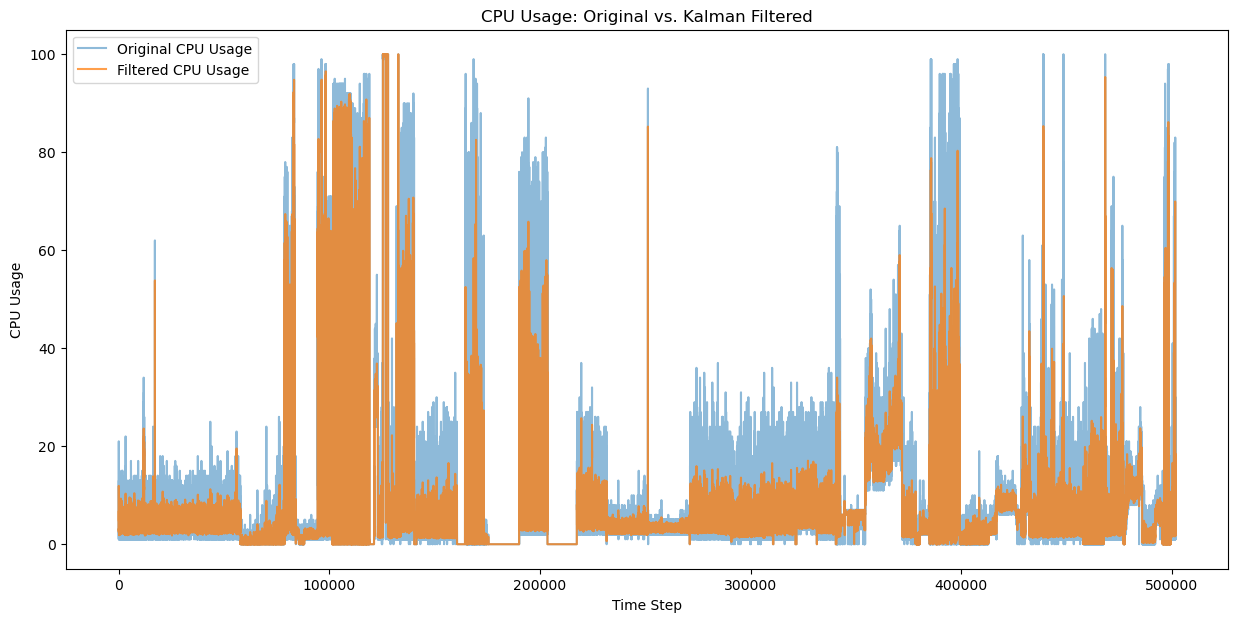

In [7]:
# 去噪
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

# 初始化卡尔曼滤波器参数
initial_state_mean = train_df['CPU_USAGE'][0]
observation_covariance = train_df['CPU_USAGE'].var()  # 观测噪声
transition_covariance = np.var(train_df['CPU_USAGE']) / 5  # 过程噪声，假设较小
transition_matrices = [1]  # 状态转移矩阵
observation_matrices = [1]  # 观测矩阵

# 初始化卡尔曼滤波器
kf = KalmanFilter(
    initial_state_mean=initial_state_mean,
    initial_state_covariance=observation_covariance,
    observation_covariance=observation_covariance,
    transition_covariance=transition_covariance,
    transition_matrices=transition_matrices,
    observation_matrices=observation_matrices
)

# 应用简单卡尔曼滤波器进行去噪
cpu_usage = train_df['CPU_USAGE'].values
cpu_usage_mean = np.mean(cpu_usage)
cpu_usage_std = np.std(cpu_usage)
cpu_usage_z_score = (cpu_usage - cpu_usage_mean) / cpu_usage_std

# 使用卡尔曼滤波器对CPU_USAGE去噪
state_means, _ = kf.filter(cpu_usage)

# 绘制去噪前后的对比时序图
plt.figure(figsize=(15, 7))
plt.plot(cpu_usage, label='Original CPU Usage', alpha=0.5)
plt.plot(state_means, label='Filtered CPU Usage', alpha=0.75)
plt.title('CPU Usage: Original vs. Kalman Filtered')
plt.xlabel('Time Step')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()

## 3. 导出数据

In [7]:
train_df.set_index('DOTTING_TIME', inplace=True)

train_df.drop(['STATUS', 'PLATFORM', 'RESOURCE_TYPE', 'DISK_USAGE', 'SJOB', 'CJOB', 'FJOB'], axis=1,
              inplace=True)
# 调整顺序
new_order = ['CPU_USAGE', 'QUEUE_ID', 'CU', 'QUEUE_TYPE', 'MEM_USAGE', 'LJOB', 'RJOB']
train_df = train_df[new_order]

# 删除不必要的队列（由EDA分析后，完全没规律，无法学习）
queue_ids_to_remove = [26, 281, 297, 298, 20889, 21487, 21671, 21673, 81221, 84151, 83609, 85617]
train_df = train_df[~train_df['QUEUE_ID'].isin(queue_ids_to_remove)]

# 七个特征
print(train_df)
# 输出处理好的数据集
train_df.to_csv('./datasets/serverless/data.csv', encoding="utf-8", index=True,
                index_label="timestamp")

               CPU_USAGE  QUEUE_ID  CU  QUEUE_TYPE  MEM_USAGE  LJOB  RJOB
DOTTING_TIME                                                             
1590683100000          3         2  16           2         54     0     0
1590683400000          2         2  16           2         54     0     0
1590683700000          7         2  16           2         54     0     0
1590684000000          4         2  16           2         54     0     0
1590684120000          5         2  16           2         54     0     0
...                  ...       ...  ..         ...        ...   ...   ...
1599867000000          3     87139  16           0         36     0     0
1599867420000          2     87139  16           0         36     0     0
1599867840000          3     87139  16           0         36     0     0
1599868260000          2     87139  16           0         36     0     0
1599868680000          2     87139  16           0         36     0     0

[312325 rows x 7 columns]


In [7]:
# 查看每个queue_id对应有多少数据
q_ids = train_df['QUEUE_ID'].value_counts().sort_index()
display(q_ids)
q_ids.to_csv('./datasets/serverless/q_ids.csv', encoding="utf-8", index=True)

QUEUE_ID
2        19255
3        19257
4        19257
26       10407
27       10526
36        3242
233       2099
281      10365
287       6876
291       8884
293       8855
297      21184
298      20381
20889    14005
21487    28931
21671    28095
21673    19726
21825    19723
81221    19781
82695    19726
82697    10642
82929    10199
83109     8958
83609     2120
84151    11857
84387    17520
84907     6495
85101     6618
85153    14353
85265    13516
85267    13082
85617     2553
85619     9997
85693    10834
85731     8568
85781     1149
85915     9220
85933     8811
85977     8793
86085     6195
86865     3544
86867     3753
87139     2378
Name: count, dtype: int64

In [7]:
# Load the provided file
queue_ids_df = pd.read_csv('./datasets/serverless/q_ids.csv')

start = 0
ranges_start = []
ranges_end = []
for index, row in queue_ids_df.iterrows():
    end = start + row['count'] - 1
    ranges_start.append(start)
    ranges_end.append(end)
    start = end + 1

# Add the range column to the dataframe
queue_ids_df['ranges_start'] = ranges_start
queue_ids_df['ranges_end'] = ranges_end
queue_ids_df.head()
queue_ids_df.to_csv('./datasets/serverless/q_ids.csv', encoding="utf-8", index=True, index_label='id')

In [15]:
queue_ids_df = pd.read_csv('./datasets/serverless/q_ids.csv')
display(queue_ids_df)
print(queue_ids_df['range'][0])

,Unnamed: 0,QUEUE_ID,count,range
0,0,2,19255,"[0, 19254]"
1,1,3,19257,"[19255, 38511]"
2,2,4,19257,"[38512, 57768]"
3,3,27,10526,"[57769, 68294]"
4,4,36,3242,"[68295, 71536]"
5,5,233,2099,"[71537, 73635]"
6,6,287,6876,"[73636, 80511]"
7,7,291,8884,"[80512, 89395]"
8,8,293,8855,"[89396, 98250]"
9,9,21825,19723,"[98251, 117973]"


[0, 19254]


In [76]:
# 根据EDA分析，我选了几个感觉可以训练的QUEUE
queues = [2, 3, 4, 27, 36, 291, 85153, 85693]
for queue_id in tqdm(queues):
    queue_df = train_df[train_df.QUEUE_ID == queue_id]
    # 删除原有的index列，换成时间列
    # queue_df.set_index('DOTTING_TIME', inplace=True)
    # 将处理好的数据导出到本地
    queue_df.to_csv('./datasets/serverless/cached/queue_id_%d.csv' % queue_id, encoding="utf-8", index=True,
                    index_label="timestamp")

100%|██████████| 8/8 [00:00<00:00, 53.90it/s]


In [10]:
for queue_id in tqdm(q_ids):
    queue_df = train_df[train_df.QUEUE_ID == queue_id]
    queue_df.to_csv('./datasets/serverless/cached/queue_id_%d.csv' % queue_id, encoding="utf-8", index=True,
                    index_label="timestamp")

100%|██████████| 31/31 [00:00<00:00, 896.95it/s]
